# Miralireza Nabavi

In [1]:
### imports
import numpy as np
import pandas as pd
import math
import scipy as sp
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import LabelBinarizer

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score

##sklearn model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
cd = pd.read_csv("susedcars.csv")
cd.head(10)

,price,trim,isOneOwner,mileage,year,color,displacement
0,43995,550,f,36858.0,2008,Silver,5.5
1,44995,550,f,46883.0,2012,Black,4.6
2,25999,550,f,108759.0,2007,White,5.5
3,33880,550,f,35187.0,2007,Black,5.5
4,34895,550,f,48153.0,2007,Black,5.5
5,5995,500,f,121748.0,2002,other,other
6,21900,550,f,115280.0,2007,other,5.5
7,41995,other,f,36370.0,2007,Black,5.5
8,39882,other,f,76996.0,2008,Black,other
9,47995,550,f,43568.0,2011,Black,5.5


In [3]:
cd.shape

(1000, 7)

In [4]:
cd['isOneOwner'].value_counts()

f    841
t    159
Name: isOneOwner, dtype: int64

In [5]:
cd['trim'].value_counts()

550      591
430      143
other    139
500      127
Name: trim, dtype: int64

In [6]:
cd['color'].value_counts()

Black     415
other     227
Silver    213
White     145
Name: color, dtype: int64

In [7]:
cd['displacement'].value_counts()

5.5      476
other    387
4.6      137
Name: displacement, dtype: int64

In [8]:
cd_one_hot = pd.get_dummies(cd[['isOneOwner','trim','color','displacement']],drop_first=True)
#X = pd.concat([cd_one_hot,cd[['mileage','year']]], axis=1)
cd_one_hot = cd_one_hot.astype('float64')
cd_one_hot.head()

,isOneOwner_t,trim_500,trim_550,trim_other,color_Silver,color_White,color_other,displacement_5.5,displacement_other
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### I am adding all of the polynomial terms upto the fourth order for mileage and year. Thus, I have 15 features for year and mileage.

In [9]:
poly=PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(cd[['mileage','year']])
X_poly = X_poly.astype('float64')
print(X_poly.shape)

(1000, 15)


In [10]:
X = np.hstack([cd_one_hot.to_numpy(),X_poly])
X.shape

(1000, 24)

### 15 features from year and mileage plus 9 features from dummy variables

In [11]:
Y = cd['price'].to_numpy()
Y = Y.astype('float64')
Y[0:5]

array([43995., 44995., 25999., 33880., 34895.])

In [12]:
## scale
scl = StandardScaler()
X = scl.fit_transform(X)
print("means should be 0, sds should be 1")
print(X.mean(axis=0))
print(X.std(axis=0))

means should be 0, sds should be 1
[-1.43995926e-16 -7.87148124e-17 -1.27675648e-16  2.61568545e-16
  3.45501405e-16  6.42819131e-17 -3.28181926e-16  3.77475828e-18
  1.77635684e-18  0.00000000e+00  1.00364161e-16 -1.85278459e-14
 -3.21964677e-17  1.46105350e-16  2.60036437e-15  2.57571742e-16
  4.09006162e-16 -8.41549053e-17 -6.78790357e-16  2.23154828e-16
 -4.61408689e-16 -1.35336187e-15  4.94937424e-16  1.74260806e-12]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape

(800, 24)

In [14]:
## simple regression
lmod = LinearRegression()
lmod.fit(X_train,y_train)

yhatl = lmod.predict(X_test)

print('r2 score on the test for linear regression is ',r2_score(y_test,yhatl))

r2 score on the test for linear regression is  0.9030385322578878


number of alphas used: 400
count      400.000000
mean      2337.768982
std       3678.142666
min         16.065665
25%         90.346405
50%        508.059969
75%       2857.004638
max      16065.664995
dtype: float64


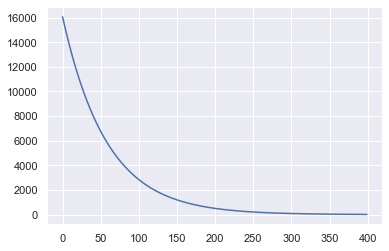

best alpha:  16.065664994610582
coeficients at best alpha:  [   65.89078722   670.69927083  2268.99005958  3044.66553337
  -189.6271073    643.51580757  -186.62870253 -2298.6079045
 -3097.93571045     0.         -5857.03594538  4351.6372831
  6627.03126679 -5170.60297882  2331.69770412     0.
  4783.75161058 -4865.69875654  1314.12434336 -4597.17710943
     0.          7800.00714658 -5156.24247442  1108.69663972]
number of 0 coefficents:  3
r2 score is for linear regression with Lasso regularization is  0.8901498909387514


In [15]:
## lasso

#alph = np.linspace(0,20000,10000)
#lcv = LassoCV(cv=10, alphas=alph)

lcv = LassoCV(cv=10, n_alphas=400)
lcv.fit(X_train,y_train)

# look at alphas used
print("number of alphas used:",lcv.n_alphas)
print(pd.Series(lcv.alphas_).describe())

plt.plot(lcv.alphas_)
plt.show()

#best alpha and coefficients
print("best alpha: ",lcv.alpha_)

#coefficents
print("coeficients at best alpha: ",lcv.coef_)
print("number of 0 coefficents: ",np.sum(lcv.coef_ == 0))

#fitted values
yhatL = lcv.predict(X_test)

print('r2 score is for linear regression with Lasso regularization is ',r2_score(y_test,yhatL))


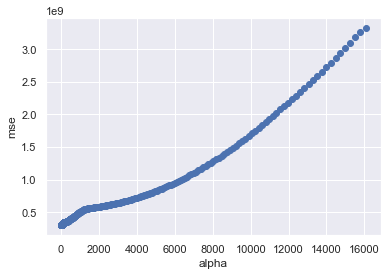

In [16]:
#mse
msep = lcv.mse_path_
mses = msep.sum(axis=1) # Averaging over all folds
plt.scatter(lcv.alphas_,mses)
plt.xlabel('alpha'); plt.ylabel('mse')
plt.show()